In [19]:
import repo.utils.mnist_reader as mnist_reader

X_train, y_train = mnist_reader.load_mnist('repo/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('repo/data/fashion', kind='t10k')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 784) (60000,)
(10000, 784) (10000,)


# Narrowing to two classes 

In [20]:
import numpy as np

num_data_points = len(X_train)

X_train_new = []
y_train_new = []

for i in range(num_data_points):
    if y_train[i] == 5:
        X_train_new.append(X_train[i])
        y_train_new.append(0)
    elif y_train[i] == 7:
        X_train_new.append(X_train[i])
        y_train_new.append(1)



X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

X_train = X_train_new
y_train = y_train_new

print(X_train.shape)
print(y_train.shape)

(12000, 784)
(12000,)


## Narrowing to two classes for testing data

In [21]:
import numpy as np

num_data_points = len(X_test)

X_test_new = []
y_test_new = []

for i in range(num_data_points):
    if y_test[i] == 5:
        X_test_new.append(X_test[i])
        y_test_new.append(0)
    elif y_test[i] == 7:
        X_test_new.append(X_test[i])
        y_test_new.append(1)

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

X_test = X_test_new
y_test = y_test_new

# Normalizing

In [22]:
from sklearn.preprocessing import StandardScaler

# Assume X_train and X_test are your training and test feature matrices
scaler = StandardScaler()

# Fit on training data and transform training data
X_train = scaler.fit_transform(X_train)

# Transform test data using the same scaler (without refitting)
X_test = scaler.transform(X_test)


# Creating small training sets

In [23]:
np.random.seed(42)

class_0_indices = np.where(y_train== 0)[0]
class_1_indices = np.where(y_train == 1)[0]

train_class_0 = class_0_indices[:10]
train_class_1 = class_1_indices[:10]

val_class_0 = class_0_indices[10:60]
val_class_1 = class_1_indices[10:60]

x_train_small = np.concatenate([X_train[train_class_0], X_train[train_class_1]])
y_train_small = np.concatenate([np.zeros(10), np.ones(10)])

x_val_small = np.concatenate([X_train[val_class_0], X_train[val_class_1]])
y_val_small = np.concatenate([np.zeros(50), np.ones(50)])

train_indices = np.random.permutation(len(x_train_small))

X_train_small = x_train_small[train_indices]
y_train_small = y_train_small[train_indices]

val_indices = np.random.permutation(len(x_val_small))



X_val_small = x_val_small[val_indices]
y_val_small = y_val_small[val_indices]

print(X_train_small.shape)
print(y_train_small.shape)
print(x_val_small.shape)
print(y_val_small.shape)

(20, 784)
(20,)
(100, 784)
(100,)


# And now, we begin the rotating

In [ ]:
import numpy as np # of course you need this
import matplotlib.pyplot as plt # for plotting
from skimage.transform import rotate # for rotating
from sklearn.datasets import fetch_lfw_people # you won't need this for the assignment

rng = np.random.default_rng() # call this once (not each time you want to do a random rotation)


# this function does a random rotation of an image (stored as a 2D array), where the number of degrees rand_degrees is drawn uniformly from [-r, r]
def randrotate(x_2d, r):
    rand_degrees = 2 * r * (rng.random() - 0.5) # uniform random rotation in [-r, r] degrees
    return rotate(x_2d, rand_degrees)

In [9]:
m = 10 # number of random rotations to do
r = 50 # number of degrees to rotate each image
c = 1 # C value for SVM
gamma = 0.001 # gamma value for SVM

height = 28
width = 28

augmented_data = [] # will be a list of 1D arrays


for i in range (m):

    for img in X_train_small:

        first_img_2d = img.reshape([height, width])

        rotated_img = randrotate(first_img_2d, r)

        augmented_data.append(rotated_img.flatten())


print(len(augmented_data))

# for img in x_train_small:

#     first_img_2d = img.reshape([height, width])

#     rotated_img = randrotate(first_img_2d, r)

# plt.imshow(rotated_img, cmap='gray')
# plt.show()

# for img in x_train_small:

    # x_2d = x.reshape([h, w])

200


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def tune_c_and_gamma(c_gamma_combinations, augmented_data_x, augmented_data_y, x_val, y_val):

    print("Tuning C and gamma")

    best_c = None
    best_gamma = None
    best_error = float('inf')

    for c_gamma in c_gamma_combinations:

        c = c_gamma[0]
        gamma = c_gamma[1]
        
        svm = SVC(kernel='rbf', C=c, gamma=gamma)

        svm.fit(augmented_data_x, augmented_data_y)

        y_pred = svm.predict(x_val)

        accuracy = accuracy_score(y_val, y_pred)

        error = 1 - accuracy

        print("C:", c)
        print("Gamma:", gamma)
        print("Error:", error)

        if error < best_error:

            print("New best error while tuning", error)
            print("New best C while tuning", c)
            print("New best gamma while tuning", gamma)
        
            best_error = error
            best_c = c
            best_gamma = gamma

    return best_c, best_gamma, best_error


In [11]:
m_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
r_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
c_values = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1, 5, 10]
gamma_values = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1, 5, 10]

def m_r_combinations(m_values, r_values):
    return [(m, r) for m in m_values for r in r_values]

def c_gamma_combinations(c_values, gamma_values):
    return [(c, gamma) for c in c_values for gamma in gamma_values]

m_r_ensemble = m_r_combinations(m_values, r_values)

c_gamma_combinations = c_gamma_combinations(c_values, gamma_values)

kernel = 'rbf'

height = 28
width = 28

best_m = None
best_r = None

best_error = float('inf')


for q, val in enumerate(m_r_ensemble):

    print("Working on m and r", val)

    print("Progress", q, '/', len(m_r_ensemble))

    augmented_data_x = []
    augmented_data_y = []


    m = val[0]
    r = val[1]

    for j, img in enumerate(X_train_small):

        for i in range (m):

            first_img_2d = img.reshape([height, width])

            rotated_img = randrotate(first_img_2d, r)

            augmented_data_x.append(rotated_img.flatten())

            augmented_data_y.append(y_train_small[j])

    tuned_c_and_gamma = tune_c_and_gamma(c_gamma_combinations, augmented_data_x, augmented_data_y, X_val_small, y_val_small)

    c = tuned_c_and_gamma[0]
    gamma = tuned_c_and_gamma[1]
    error = tuned_c_and_gamma[2]

    if error < best_error:

        print("New best error for m and r", error)
        
        best_error = error
        best_m = m
        best_r = r

print("Best error", best_error)
print("Best m", best_m)
print("Best r", best_r)


Working on m and r (10, 5)
Progress 0 / 100
Tuning C and gamma
Error: 0.43999999999999995
New best error while tuning 0.43999999999999995
Error: 0.17000000000000004
New best error while tuning 0.17000000000000004
Error: 0.08999999999999997
New best error while tuning 0.08999999999999997
Error: 0.5
Error: 0.30000000000000004
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.43999999999999995
Error: 0.17000000000000004
Error: 0.08999999999999997
Error: 0.5
Error: 0.30000000000000004
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.43999999999999995
Error: 0.17000000000000004
Error: 0.08999999999999997
Error: 0.5
Error: 0.30000000000000004
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.43999999999999995
Error: 0.17000000000000004
Error: 0.10999999999999999
Error: 0.5
Error: 0.30000000000000004
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.43999999999999995
Error: 0.17000000000000004

In [12]:
print("Best error", best_error)
print("Best m", best_m)
print("Best r", best_r)

Best error 0.050000000000000044
Best m 20
Best r 5


In [42]:
c_values = [1]
gamma_values = [0.0001]

m = 20
r = 5

def c_gamma_combinations(c_values, gamma_values):
    return [(c, gamma) for c in c_values for gamma in gamma_values]

c_gamma_combinations = c_gamma_combinations(c_values, gamma_values)

augmented_data_x = []
augmented_data_y = []

for j, img in enumerate(X_train_small):

        for i in range (m):

            first_img_2d = img.reshape([height, width])

            rotated_img = randrotate(first_img_2d, r)

            augmented_data_x.append(rotated_img.flatten())

            augmented_data_y.append(y_train_small[j])

tuned_c_and_gamma = tune_c_and_gamma(c_gamma_combinations, augmented_data_x, augmented_data_y, X_val_small, y_val_small)



Tuning C and gamma
Error: 0.050000000000000044
New best error while tuning 0.050000000000000044
New best C while tuning 1
New best gamma while tuning 0.0001


In [81]:
def compare_on_test_data(c_gamma_combinations, augmented_data_x, augmented_data_y, x_val, y_val):

    best_c = None
    best_gamma = None
    best_error = float('inf')

    # for c_gamma in c_gamma_combinations:

    c = c_gamma_combinations[0][0]
    gamma = c_gamma_combinations[0][1]
    
    svm = SVC(kernel='rbf', C=c, gamma=gamma)

    svm.fit(augmented_data_x, augmented_data_y)

    print(X_test.shape)
    print(y_test.shape)

    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # y_pred = svm.predict(x_val)

    # accuracy = accuracy_score(y_val, y_pred)

    error = 1 - accuracy

    best_error = error
    best_c = c
    best_gamma = gamma

    return best_c, best_gamma, best_error

In [86]:
tuned_c = 1
tuned_gamma = 0.0001
tuned_m = 20
tuned_r = 5


c_values = [1]
gamma_values = [0.0001]

m = 20
r = 5


def c_gamma_combinations(c_values, gamma_values):
    return [(c, gamma) for c in c_values for gamma in gamma_values]

c_gamma_combinations = c_gamma_combinations(c_values, gamma_values)

augmented_data_x = []
augmented_data_y = []

for j, img in enumerate(X_train_small):

        for i in range (m):

            first_img_2d = img.reshape([height, width])

            rotated_img = randrotate(first_img_2d, r)

            augmented_data_x.append(rotated_img.flatten())

            augmented_data_y.append(y_train_small[j])

tuned_c_and_gamma = compare_on_test_data(c_gamma_combinations, augmented_data_x, augmented_data_y, X_val_small, y_val_small)

c = tuned_c_and_gamma[0]
gamma = tuned_c_and_gamma[1]
error = tuned_c_and_gamma[2]

print("Error on test data", error)
print("C", c)
print("Gamma", gamma)

(2000, 784)
(2000,)
Error on test data 0.123
C 1
Gamma 0.0001


# No augmentation

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

c_values = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1, 5, 10]
gamma_values = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1, 5, 10]

def combinations(c_values, gamma_values):
    return [(c, gamma) for c in c_values for gamma in gamma_values]

c_gamma_combinations = combinations(c_values, gamma_values)

tuned_c_and_gamma = tune_c_and_gamma(c_gamma_combinations, x_train_small, y_train_small, X_val_small, y_val_small)

best_c = tuned_c_and_gamma[0]
best_gamma = tuned_c_and_gamma[1]
best_error = tuned_c_and_gamma[2]

print("Best error", best_error)
print("Best C", best_c)
print("Best gamma", best_gamma)


Tuning C and gamma
C: 0.0001
Gamma: 0.0001
Error: 0.5
New best error while tuning 0.5
New best C while tuning 0.0001
New best gamma while tuning 0.0001
C: 0.0001
Gamma: 0.005
Error: 0.36
New best error while tuning 0.36
New best C while tuning 0.0001
New best gamma while tuning 0.005
C: 0.0001
Gamma: 0.001
Error: 0.42000000000000004
C: 0.0001
Gamma: 0.05
Error: 0.43999999999999995
C: 0.0001
Gamma: 0.01
Error: 0.36
C: 0.0001
Gamma: 0.5
Error: 0.56
C: 0.0001
Gamma: 0.1
Error: 0.45999999999999996
C: 0.0001
Gamma: 0.5
Error: 0.56
C: 0.0001
Gamma: 1
Error: 0.5900000000000001
C: 0.0001
Gamma: 5
Error: 0.52
C: 0.0001
Gamma: 10
Error: 0.5
C: 0.005
Gamma: 0.0001
Error: 0.5
C: 0.005
Gamma: 0.005
Error: 0.36
C: 0.005
Gamma: 0.001
Error: 0.42000000000000004
C: 0.005
Gamma: 0.05
Error: 0.43999999999999995
C: 0.005
Gamma: 0.01
Error: 0.36
C: 0.005
Gamma: 0.5
Error: 0.56
C: 0.005
Gamma: 0.1
Error: 0.45999999999999996
C: 0.005
Gamma: 0.5
Error: 0.56
C: 0.005
Gamma: 1
Error: 0.5900000000000001
C: 0.005

In [102]:
# Set these values to the best values found in the previous step
# c = 0.0001
# gamma = 0.005
c=1
gamma = 0.01

kernal = 'rbf'

svm = SVC(kernel=kernal, C=c, gamma=gamma)

svm.fit(x_train_small, y_train_small)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

error = 1 - accuracy

print("Error:", error)


Error: 0.37649999999999995


# Fixing R, varying M

In [119]:
m_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
c_values = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1, 5, 10]
gamma_values = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1, 5, 10]
r_values = [10]

def m_r_combinations(m_values, r_values):
    return [(m, r) for m in m_values for r in r_values]

def c_gamma_combinations(c_values, gamma_values):
    return [(c, gamma) for c in c_values for gamma in gamma_values]

m_r_ensemble = m_r_combinations(m_values, r_values)

c_gamma_combinations = c_gamma_combinations(c_values, gamma_values)

kernel = 'rbf'

height = 28
width = 28

best_m = None
best_r = None

best_error = float('inf')

tuned_values = []


for q, val in enumerate(m_r_ensemble):

    print("Working on m and r", val)

    print("Progress", q, '/', len(m_r_ensemble))

    augmented_data_x = []
    augmented_data_y = []


    m = val[0]
    r = val[1]

    for j, img in enumerate(X_train_small):

        for i in range (m):

            first_img_2d = img.reshape([height, width])

            rotated_img = randrotate(first_img_2d, r)

            augmented_data_x.append(rotated_img.flatten())

            augmented_data_y.append(y_train_small[j])

    tuned_c_and_gamma = tune_c_and_gamma(c_gamma_combinations, augmented_data_x, augmented_data_y, X_val_small, y_val_small)

    c = tuned_c_and_gamma[0]
    gamma = tuned_c_and_gamma[1]
    error = tuned_c_and_gamma[2]

    tuned_values.append((m, r, c, gamma))


for val in tuned_values:

    print("m", val[0])
    print("r", val[1])
    print("c", val[2])
    print("gamma", val[3])


Working on m and r (10, 10)
Progress 0 / 10
Tuning C and gamma
C: 0.0001
Gamma: 0.0001
Error: 0.43000000000000005
New best error while tuning 0.43000000000000005
New best C while tuning 0.0001
New best gamma while tuning 0.0001
C: 0.0001
Gamma: 0.005
Error: 0.22999999999999998
New best error while tuning 0.22999999999999998
New best C while tuning 0.0001
New best gamma while tuning 0.005
C: 0.0001
Gamma: 0.001
Error: 0.08999999999999997
New best error while tuning 0.08999999999999997
New best C while tuning 0.0001
New best gamma while tuning 0.001
C: 0.0001
Gamma: 0.05
Error: 0.5
C: 0.0001
Gamma: 0.01
Error: 0.31000000000000005
C: 0.0001
Gamma: 0.5
Error: 0.5
C: 0.0001
Gamma: 0.1
Error: 0.5
C: 0.0001
Gamma: 0.5
Error: 0.5
C: 0.0001
Gamma: 1
Error: 0.5
C: 0.0001
Gamma: 5
Error: 0.5
C: 0.0001
Gamma: 10
Error: 0.5
C: 0.005
Gamma: 0.0001
Error: 0.43000000000000005
C: 0.005
Gamma: 0.005
Error: 0.22999999999999998
C: 0.005
Gamma: 0.001
Error: 0.08999999999999997
C: 0.005
Gamma: 0.05
Error: 0

In [120]:
for combo in tuned_values:
    print("Working on combination", combo)

#m
#r
#c
#gamma

Working on combination (10, 10, 5, 0.0001)
Working on combination (20, 10, 10, 0.0001)
Working on combination (30, 10, 5, 0.0001)
Working on combination (40, 10, 0.5, 0.0001)
Working on combination (50, 10, 1, 0.0001)
Working on combination (60, 10, 1, 0.0001)
Working on combination (70, 10, 0.5, 0.0001)
Working on combination (80, 10, 0.5, 0.0001)
Working on combination (90, 10, 0.5, 0.0001)
Working on combination (100, 10, 0.5, 0.0001)


In [121]:
errors = []

for combo in tuned_values:

    m = combo[0]
    r = combo[1]
    c = combo[2]
    gamma = combo[3]

    print("R:", r)

    c_gamma_combinations = [(c, gamma)]

    augmented_data_x = []
    augmented_data_y = []

    for j, img in enumerate(X_train_small):

            for i in range (m):

                first_img_2d = img.reshape([height, width])

                rotated_img = randrotate(first_img_2d, r)

                augmented_data_x.append(rotated_img.flatten())

                augmented_data_y.append(y_train_small[j])

    tuned_c_and_gamma = compare_on_test_data(c_gamma_combinations, augmented_data_x, augmented_data_y, X_val_small, y_val_small)

    c = tuned_c_and_gamma[0]
    gamma = tuned_c_and_gamma[1]
    error = tuned_c_and_gamma[2]

    errors.append((m, error))

    

R: 10
(2000, 784)
(2000,)
R: 10
(2000, 784)
(2000,)
R: 10
(2000, 784)
(2000,)
R: 10
(2000, 784)
(2000,)
R: 10
(2000, 784)
(2000,)
R: 10
(2000, 784)
(2000,)
R: 10
(2000, 784)
(2000,)
R: 10
(2000, 784)
(2000,)
R: 10
(2000, 784)
(2000,)
R: 10
(2000, 784)
(2000,)


In [122]:
for data in errors:
    
    print("m", data[0])
    print("Error", data[1])

m 10
Error 0.12150000000000005
m 20
Error 0.121
m 30
Error 0.11850000000000005
m 40
Error 0.125
m 50
Error 0.12050000000000005
m 60
Error 0.11399999999999999
m 70
Error 0.126
m 80
Error 0.125
m 90
Error 0.12250000000000005
m 100
Error 0.12050000000000005


# Plotting

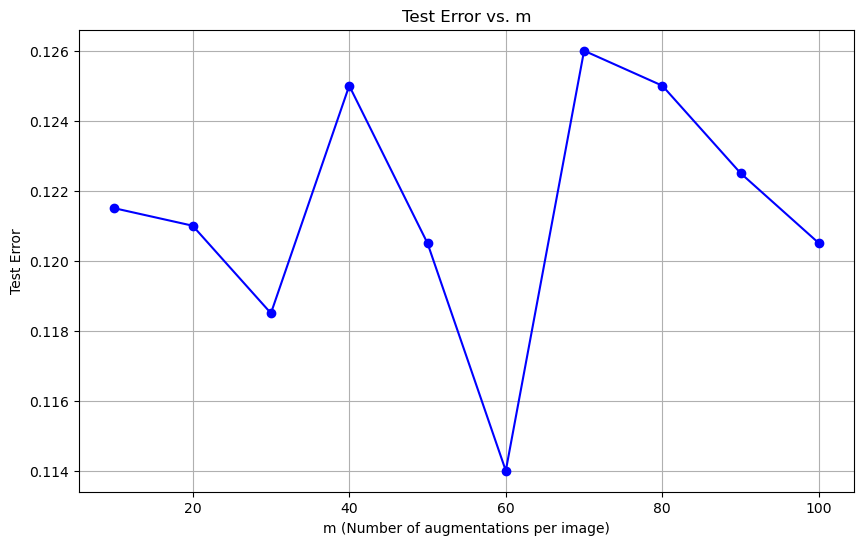

In [123]:
import matplotlib.pyplot as plt

def plot_error_vs_m(errors):
    m_values = [data[0] for data in errors]
    error_values = [data[1] for data in errors]
    
    plt.figure(figsize=(10, 6))
    plt.plot(m_values, error_values, marker='o', linestyle='-', color='b')
    plt.xlabel('m (Number of augmentations per image)')
    plt.ylabel('Test Error')
    plt.title('Test Error vs. m')
    plt.grid(True)
    plt.show()
a
plot_error_vs_m(errors)


# Keeping M constant

In [124]:
m_values = [30]
c_values = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1, 5, 10]
gamma_values = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1, 5, 10]
r_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

def m_r_combinations(m_values, r_values):
    return [(m, r) for m in m_values for r in r_values]

def c_gamma_combinations(c_values, gamma_values):
    return [(c, gamma) for c in c_values for gamma in gamma_values]

m_r_ensemble = m_r_combinations(m_values, r_values)

c_gamma_combinations = c_gamma_combinations(c_values, gamma_values)

kernel = 'rbf'

height = 28
width = 28

best_m = None
best_r = None

best_error = float('inf')

tuned_values = []


for q, val in enumerate(m_r_ensemble):

    print("Working on m and r", val)

    print("Progress", q, '/', len(m_r_ensemble))

    augmented_data_x = []
    augmented_data_y = []


    m = val[0]
    r = val[1]

    for j, img in enumerate(X_train_small):

        for i in range (m):

            first_img_2d = img.reshape([height, width])

            rotated_img = randrotate(first_img_2d, r)

            augmented_data_x.append(rotated_img.flatten())

            augmented_data_y.append(y_train_small[j])

    tuned_c_and_gamma = tune_c_and_gamma(c_gamma_combinations, augmented_data_x, augmented_data_y, X_val_small, y_val_small)

    c = tuned_c_and_gamma[0]
    gamma = tuned_c_and_gamma[1]
    error = tuned_c_and_gamma[2]

    tuned_values.append((m, r, c, gamma))


for val in tuned_values:

    print("m", val[0])
    print("r", val[1])
    print("c", val[2])
    print("gamma", val[3])


Working on m and r (30, 10)
Progress 0 / 10
Tuning C and gamma
C: 0.0001
Gamma: 0.0001
Error: 0.43999999999999995
New best error while tuning 0.43999999999999995
New best C while tuning 0.0001
New best gamma while tuning 0.0001
C: 0.0001
Gamma: 0.005
Error: 0.19999999999999996
New best error while tuning 0.19999999999999996
New best C while tuning 0.0001
New best gamma while tuning 0.005
C: 0.0001
Gamma: 0.001
Error: 0.09999999999999998
New best error while tuning 0.09999999999999998
New best C while tuning 0.0001
New best gamma while tuning 0.001
C: 0.0001
Gamma: 0.05
Error: 0.5
C: 0.0001
Gamma: 0.01
Error: 0.29000000000000004
C: 0.0001
Gamma: 0.5
Error: 0.5
C: 0.0001
Gamma: 0.1
Error: 0.5
C: 0.0001
Gamma: 0.5
Error: 0.5
C: 0.0001
Gamma: 1
Error: 0.5
C: 0.0001
Gamma: 5
Error: 0.5
C: 0.0001
Gamma: 10
Error: 0.5
C: 0.005
Gamma: 0.0001
Error: 0.43999999999999995
C: 0.005
Gamma: 0.005
Error: 0.19999999999999996
C: 0.005
Gamma: 0.001
Error: 0.09999999999999998
C: 0.005
Gamma: 0.05
Error: 0

In [125]:
for combo in tuned_values:
    print("Working on combination", combo)

#m
#r
#c
#gamma

Working on combination (30, 10, 5, 0.0001)
Working on combination (30, 20, 0.5, 0.001)
Working on combination (30, 30, 0.5, 0.001)
Working on combination (30, 40, 0.5, 0.001)
Working on combination (30, 50, 0.5, 0.0001)
Working on combination (30, 60, 1, 0.001)
Working on combination (30, 70, 0.05, 0.001)
Working on combination (30, 80, 0.05, 0.001)
Working on combination (30, 90, 0.05, 0.001)
Working on combination (30, 100, 0.05, 0.001)


In [126]:
errors = []

for combo in tuned_values:

    m = combo[0]
    r = combo[1]
    c = combo[2]
    gamma = combo[3]

    print("M:", m)

    c_gamma_combinations = [(c, gamma)]

    augmented_data_x = []
    augmented_data_y = []

    for j, img in enumerate(X_train_small):

            for i in range (m):

                first_img_2d = img.reshape([height, width])

                rotated_img = randrotate(first_img_2d, r)

                augmented_data_x.append(rotated_img.flatten())

                augmented_data_y.append(y_train_small[j])

    tuned_c_and_gamma = compare_on_test_data(c_gamma_combinations, augmented_data_x, augmented_data_y, X_val_small, y_val_small)

    c = tuned_c_and_gamma[0]
    gamma = tuned_c_and_gamma[1]
    error = tuned_c_and_gamma[2]

    errors.append((r, error))

    

M: 30
(2000, 784)
(2000,)
M: 30
(2000, 784)
(2000,)
M: 30
(2000, 784)
(2000,)
M: 30
(2000, 784)
(2000,)
M: 30
(2000, 784)
(2000,)
M: 30
(2000, 784)
(2000,)
M: 30
(2000, 784)
(2000,)
M: 30
(2000, 784)
(2000,)
M: 30
(2000, 784)
(2000,)
M: 30
(2000, 784)
(2000,)


In [127]:
for data in errors:
    
    print("r", data[0])
    print("Error", data[1])

r 10
Error 0.12250000000000005
r 20
Error 0.10299999999999998
r 30
Error 0.11550000000000005
r 40
Error 0.123
r 50
Error 0.15449999999999997
r 60
Error 0.128
r 70
Error 0.14300000000000002
r 80
Error 0.14249999999999996
r 90
Error 0.14149999999999996
r 100
Error 0.139


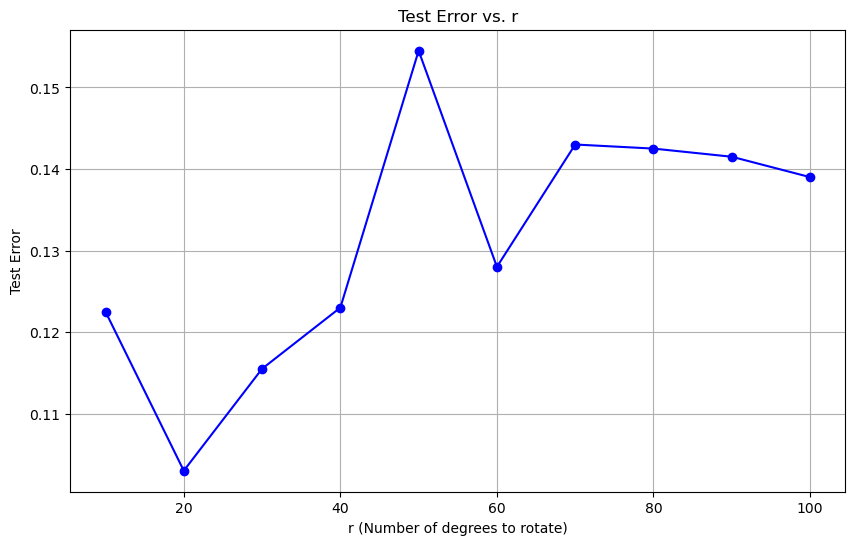

In [128]:
import matplotlib.pyplot as plt

def plot_error_vs_r(errors):
    m_values = [data[0] for data in errors]
    error_values = [data[1] for data in errors]
    
    plt.figure(figsize=(10, 6))
    plt.plot(m_values, error_values, marker='o', linestyle='-', color='b')
    plt.xlabel('r (Number of degrees to rotate)')
    plt.ylabel('Test Error')
    plt.title('Test Error vs. r')
    plt.grid(True)
    plt.show()

plot_error_vs_r(errors)
